In [ ]:
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/21accel/bank_churn_prediction/main/BankChruner-Processed.csv')
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,3,1,3,1,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,3,2,5,3,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,4,1,3,3,2,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,3,2,4,1,0,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,3,1,3,0,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,4,1,2,3,1,2,1,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,3,1,2,-1,3,2,1,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,3,2,1,1,2,1,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,2,1,2,3,0,2,1,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
#Split X (train) and Y (target) from data
X = pd.DataFrame(data.loc[:, data.columns != 'Attrition_Flag'])
y = pd.DataFrame(data.loc[:, data.columns == 'Attrition_Flag'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (10127, 19)
Shape of y: (10127, 1)


In [ ]:
# train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import cross_val_score
#train model with cv of 5
cv_scores = cross_val_score(gnb, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.69002962 0.83316881 0.93975309 0.94567901 0.84148148]
cv_scores mean:0.8500224001559967


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[1617   93]
 [ 122  194]] : is the confusion matrix
0.8938795656465943 : is the accuracy score
0.6759581881533101 : is the precision score
0.6139240506329114 : is the recall score
0.6434494195688226 : is the f1 score


#Improving the Model

##Check correlations

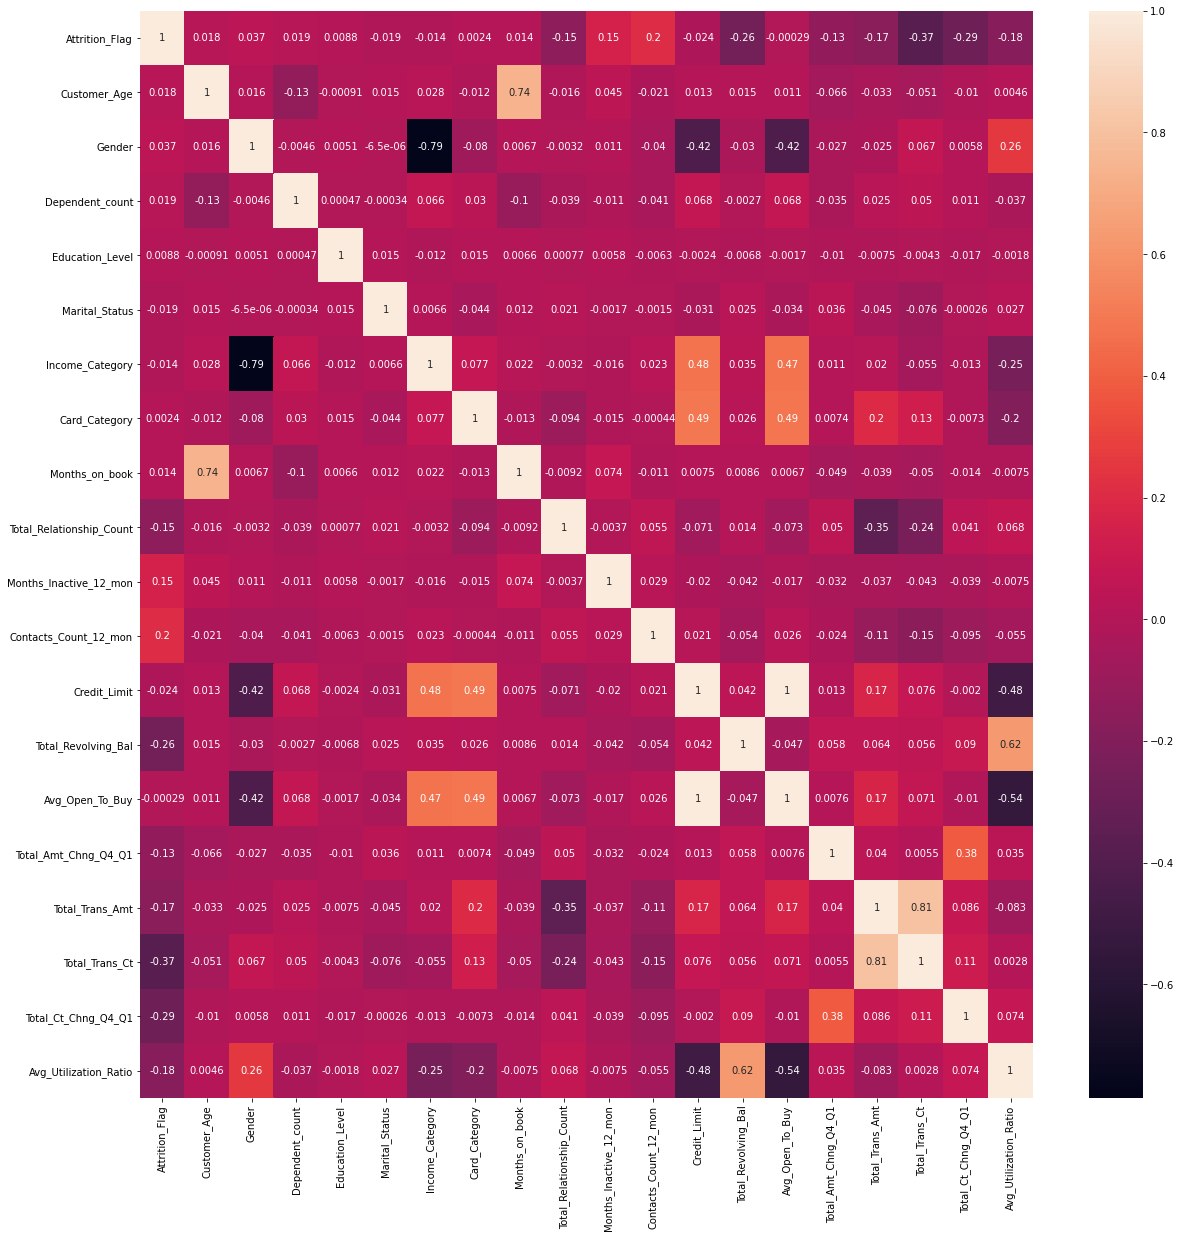

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20))
# calculate the correlations
correlations = data.corr()

# plot the heatmap 
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)


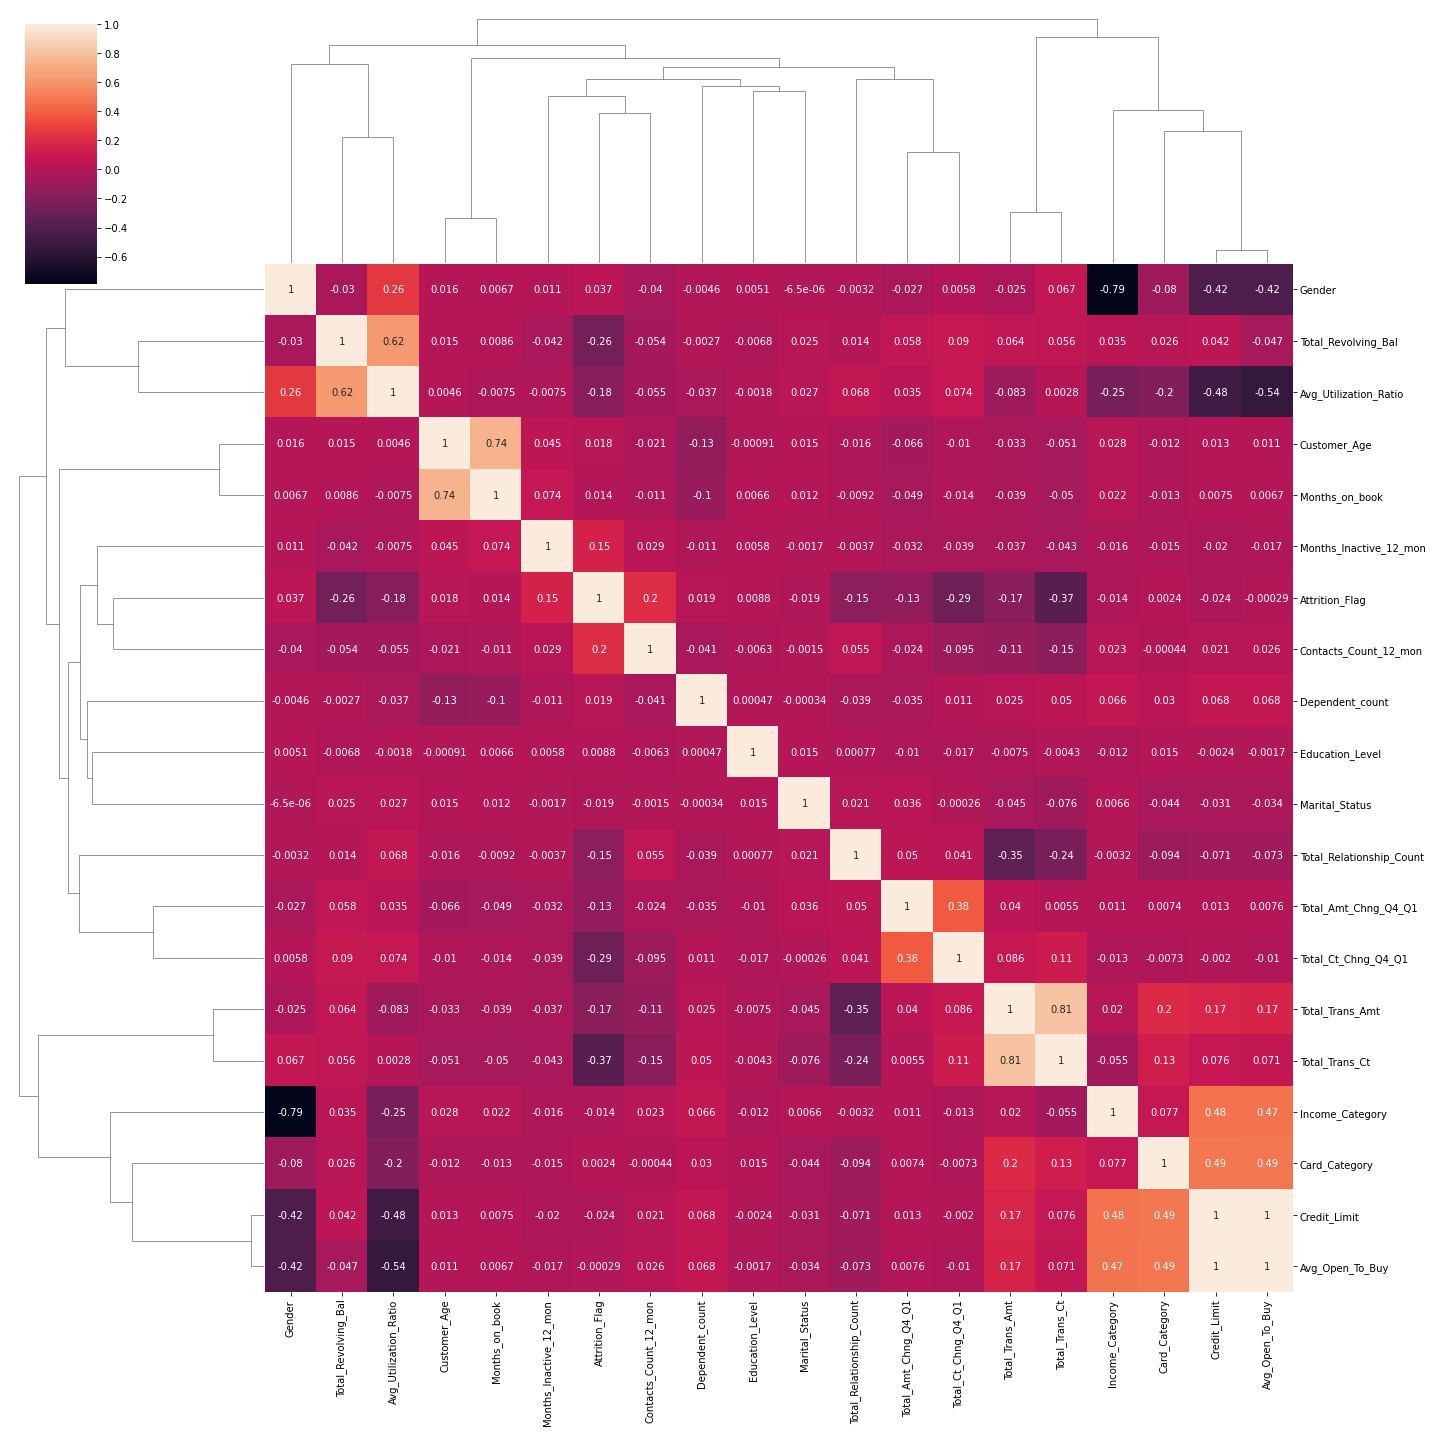

In [ ]:
# plot the clustermap 
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True, figsize=(20,20))

From correlation above we need to remove one label that has correlation above 0.7

- Customer_Age and months_on_book
- total_trans_amt and total_trans_ct
- credit_limit and avg_open_to_buy

In [ ]:
# removing one from each correlated labels
data.drop(columns=['Months_on_book'], axis=1, inplace=True)
data.drop(columns=['Total_Trans_Ct'], axis=1, inplace=True)
data.drop(columns=['Avg_Open_To_Buy'], axis=1, inplace=True)
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,3,1,3,1,2,3,1,5,1,3,12691.0,777,1.335,1144,1.625,0.061
1,0,3,2,5,3,1,1,1,6,1,2,8256.0,864,1.541,1291,3.714,0.105
2,0,4,1,3,3,2,4,1,4,1,0,3418.0,0,2.594,1887,2.333,0.000
3,0,3,2,4,1,0,1,1,3,4,1,3313.0,2517,1.405,1171,2.333,0.760
4,0,3,1,3,0,2,3,1,5,1,0,4716.0,0,2.175,816,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,4,1,2,3,1,2,1,3,2,3,4003.0,1851,0.703,15476,0.857,0.462
10123,1,3,1,2,-1,3,2,1,4,2,3,4277.0,2186,0.804,8764,0.683,0.511
10124,1,3,2,1,1,2,1,1,5,3,4,5409.0,0,0.819,10291,0.818,0.000
10125,1,2,1,2,3,0,2,1,4,3,3,5281.0,0,0.535,8395,0.722,0.000


#Rebuild the model

In [ ]:
#Split X (train) and Y (target) from data
X = pd.DataFrame(data.loc[:, data.columns != 'Attrition_Flag'])
y = pd.DataFrame(data.loc[:, data.columns == 'Attrition_Flag'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (10127, 16)
Shape of y: (10127, 1)


In [ ]:
# train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#train model with cv of 5
cv_scores = cross_val_score(gnb, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.87907206 0.84550839 0.87407407 0.88740741 0.84098765]
cv_scores mean:0.8654099179798423


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [ ]:
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

[[1645   65]
 [ 181  135]] : is the confusion matrix
0.87857847976308 : is the accuracy score
0.675 : is the precision score
0.4272151898734177 : is the recall score
0.5232558139534884 : is the f1 score


The accuracy drop by 1%

#Using SMOTE for imbalance data

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1' in data train: {}".format(sum(y_train['Attrition_Flag']==1)))
print("Before OverSampling, counts of label '0' in data train: {} \n".format(sum(y_train['Attrition_Flag']==0)))

sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Number transactions X_train dataset:  (8101, 16)
Number transactions y_train dataset:  (8101, 1)
Number transactions X_test dataset:  (2026, 16)
Number transactions y_test dataset:  (2026, 1)
Before OverSampling, counts of label '1' in data train: 1311
Before OverSampling, counts of label '0' in data train: 6790 

After OverSampling, the shape of train_X: (13580, 16)
After OverSampling, the shape of train_y: (13580,) 

After OverSampling, counts of label '1': 6790
After OverSampling, counts of label '0': 6790


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##Rebuild our model again

In [ ]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_res, y_train_res)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

[[1200  510]
 [  84  232]] : is the confusion matrix
0.7068114511352419 : is the accuracy score
0.31266846361185985 : is the precision score
0.7341772151898734 : is the recall score
0.43856332703213613 : is the f1 score


Accuracy drops to 70%

So don't use SMOTE anymore

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-0.21138164 -1.05995565  0.50336813 ... -0.95970657  3.8340026
  -0.77588223]
 [-0.21138164  0.9434357   2.04319867 ... -0.91643261 12.60857291
  -0.61627565]
 [ 0.95646444 -1.05995565  0.50336813 ... -0.74098169  6.80786367
  -0.99715499]
 ...
 [-0.21138164  0.9434357  -1.03646242 ...  1.73299393  0.44430503
  -0.99715499]
 [-1.37922772 -1.05995565 -0.26654715 ...  1.17484807  0.04106963
  -0.99715499]
 [-0.21138164  0.9434357  -0.26654715 ...  1.73387707 -0.26555729
  -0.31157218]]


#Hyperparameter Tuning

In [ ]:
#redefine data train into numpy array
X = np.array(data.loc[:, data.columns != 'Attrition_Flag'])
y = np.array(data.loc[:, data.columns == 'Attrition_Flag'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Shape of X: (10127, 16)
Shape of y: (10127, 1)


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1, scoring='accuracy')
nbModel_grid.fit(X_train, y_train.ravel())
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.4s


GaussianNB(priors=None, var_smoothing=1e-09)


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.0s finished


In [ ]:
nbModel_grid.best_estimator_

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nbModel_grid.best_params_

{'var_smoothing': 1e-09}

In [ ]:
nbModel_grid.best_score_

0.8769307819944892

In [ ]:
y_pred = nbModel_grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

[[1649   68]
 [ 173  136]] : is the confusion matrix
0.8810463968410661 : is the accuracy score
0.6666666666666666 : is the precision score
0.4401294498381877 : is the recall score
0.530214424951267 : is the f1 score
